In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.DataFrame({'height':[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,15000,20000,25000,30000,40000,50000,60000,70000,80000], 'density':[1.225,1.112,1.007,0.9093,0.8194,0.7364,0.6601,0.59,0.5258,0.4671,0.4135,0.1948,0.08891,0.04008,0.01841,0.003996,0.001027,0.0003097,0.00008283,0.00001846]})

Text(0.5, 1.0, 'Height Above Sea Level vs. Atmospheric Density')

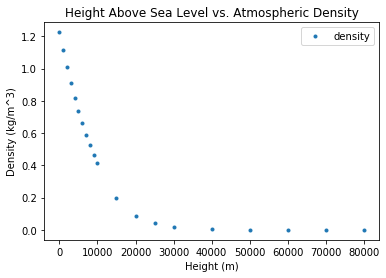

In [73]:
data.plot('height', 'density', style='.')
plt.xlabel("Height (m)")
plt.ylabel("Density (kg/m^3)")
plt.title("Height Above Sea Level vs. Atmospheric Density")

2b) Fit the density data as a function of altitude using a function of the form $f(x)=A e^{Bx+c\sqrt{x}}$

2c) Determine the parameters A,B,C as well as the uncertainties on these parameters

In [74]:
import seaborn as sns
from scipy.optimize import curve_fit

def fitfunction(x, *paramlist):
    return paramlist[0]*np.exp(paramlist[1]*x+paramlist[2]*np.sqrt(x))

init_vals=[0.0 for x in range(3)]

x=np.array(data['height'])
y=np.array(data['density'])
popt, pcov = curve_fit(fitfunction, x, y, p0=init_vals)

print("Coefficients: "+str(popt))

asigma=np.sqrt(pcov[0,0])
bsigma=np.sqrt(pcov[1,1])
csigma=np.sqrt(pcov[2,2])
print()
print("Uncertainty in A: "+str(asigma))
print("Uncertainty in B: "+str(bsigma))
print("Uncertainty in C: "+str(csigma))

Coefficients: [ 1.21024742e+00 -1.30612878e-04  2.06342534e-03]

Uncertainty in A: 0.015015493634884915
Uncertainty in B: 5.239846308938223e-06
Uncertainty in C: 0.0005212600715275357


2d) Plot the fit, including 95% confidence interval bands, along with the data. What is your evaluation of the quality of the fit? Can you think of a different approach that might yield a better fit?

<function matplotlib.pyplot.show(*args, **kw)>

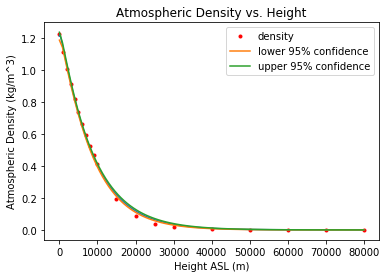

In [75]:
xi = np.linspace(0,80000,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,5,axis=0)
upper = np.percentile(ysample,95,axis=0)

data.plot('height', 'density', style='r.')
xbase=np.arange(0, 80000, 1)
plt.plot(xbase, fitfunction(xbase, popt[0], popt[1], popt[2]))
plt.plot(xi, lower, label="lower 95% confidence")
plt.plot(xi, upper, label="upper 95% confidence")
plt.xlabel("Height ASL (m)")
plt.ylabel("Atmospheric Density (kg/m^3)")
plt.title("Atmospheric Density vs. Height")
plt.legend()
plt.show

2d) The evaluation seems to be fairly accurate except for the points between 10,000 and 30,000. This may be because different layers of the atmosphere have different properties, such as temperatures sometimes increasing or decreasing depending on the layer. One way to overcome this might be to model each layer seperately, then create a sort of piecewise or interpolated function to model the density.